In [1]:
#imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('air quality data.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#No. of rows and columns 
df.shape

(29531, 16)

In [4]:
#To know the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
#To find the duplicate values
df.duplicated()  #Prints in true or false
df.duplicated().sum()   #How many duplicate values are there

0

In [6]:
#To find the missing values 
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
#If the missing values are greater than 15%, we remove them
#Drop the rows where AQI has missing values 
df.dropna(subset=['AQI'],inplace=True)

In [8]:
#To check if values are removed and if so sort them
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [9]:
df.shape
# Previously it was (29531, 16) and now is(24850, 16) 

(24850, 16)

In [10]:
#Summary of statistics in dataset
df.describe()
#To transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [11]:
#Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [12]:
#Xylene has the highest percentage of missing values - 61.86%
#Pm10 - 28.52% , NH3 - 26.3% ,Toulene - 23.44% 

In [13]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()

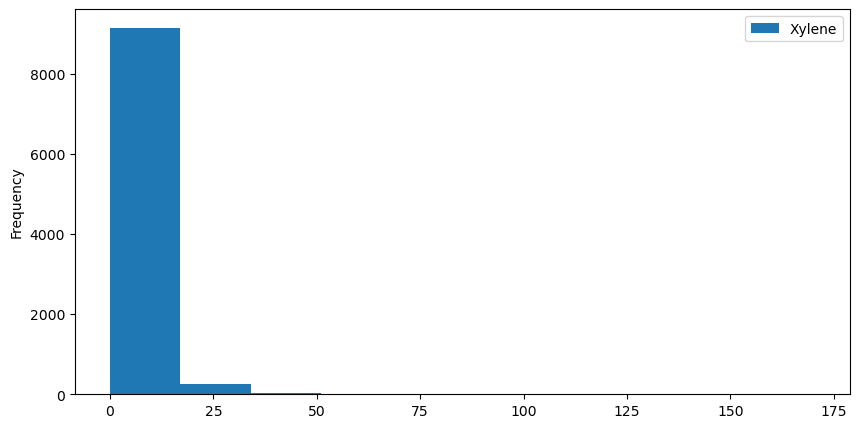

In [14]:
df['Xylene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

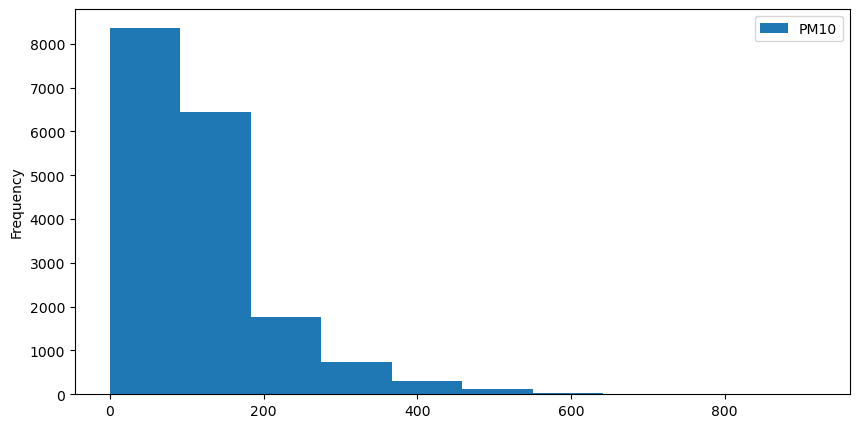

In [15]:
df['PM10'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

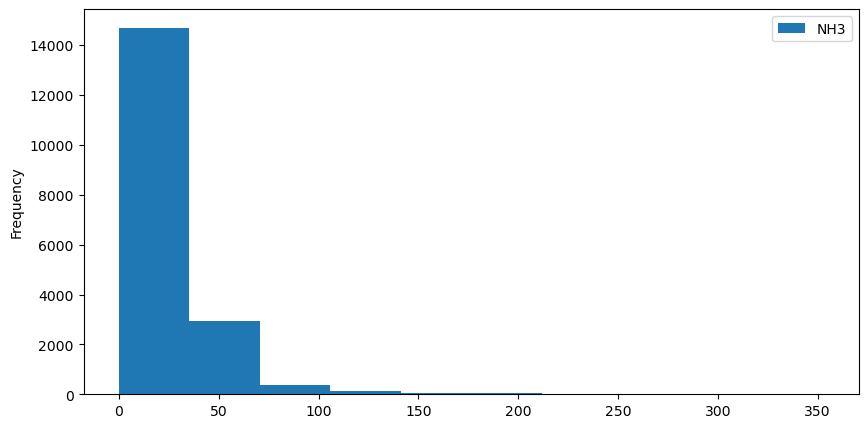

In [16]:
df['NH3'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

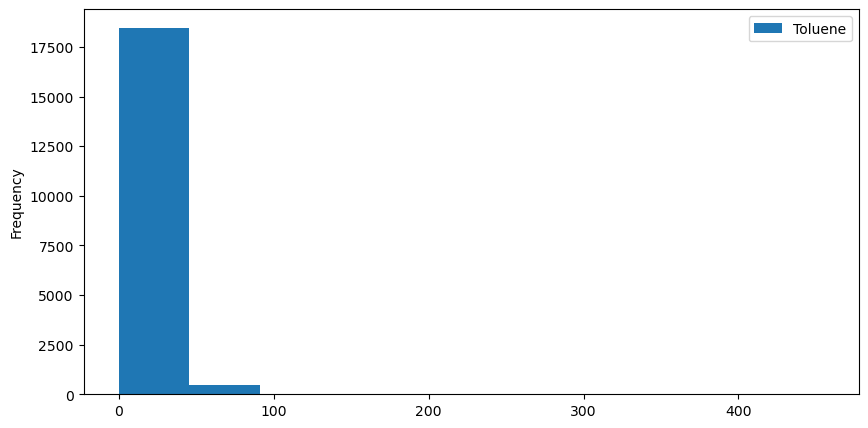

In [17]:
df['Toluene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

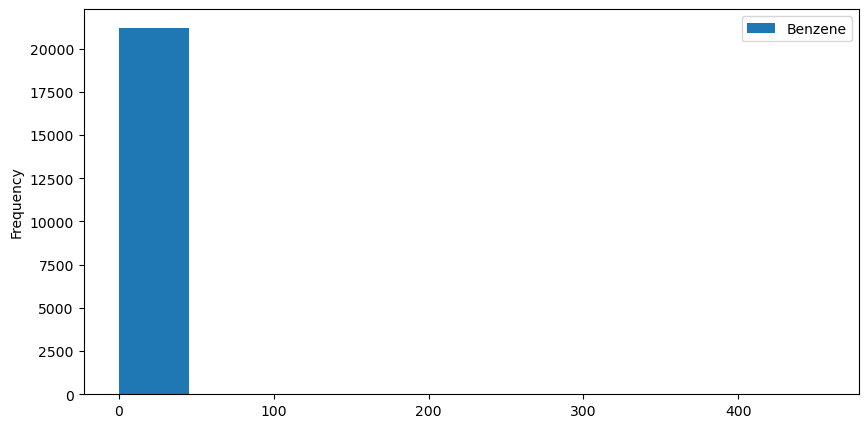

In [18]:
df['Benzene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

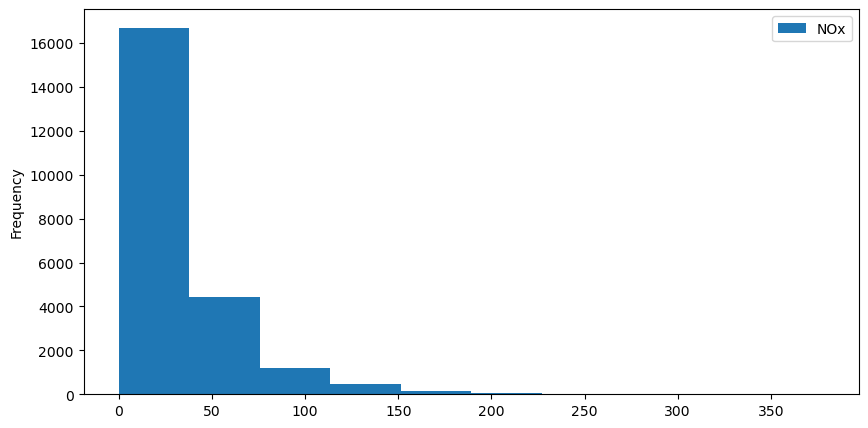

In [19]:
df['NOx'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

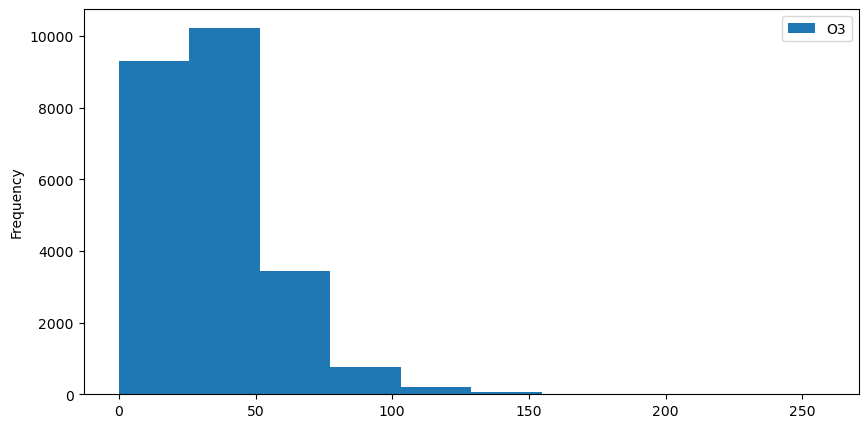

In [20]:
df['O3'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

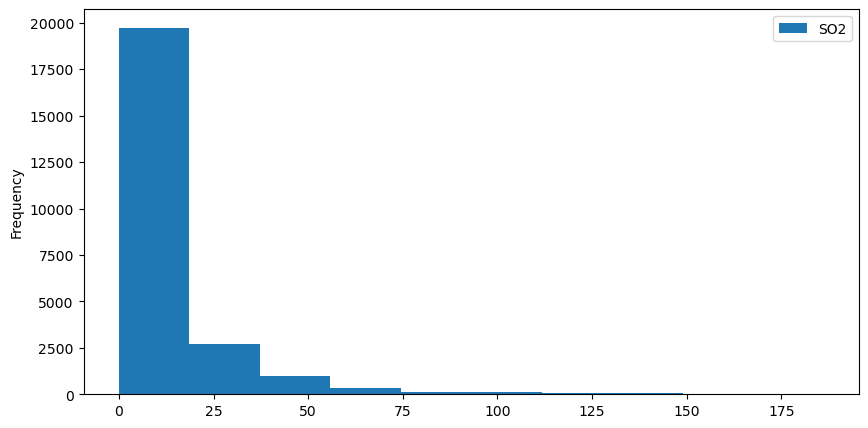

In [21]:
df['SO2'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

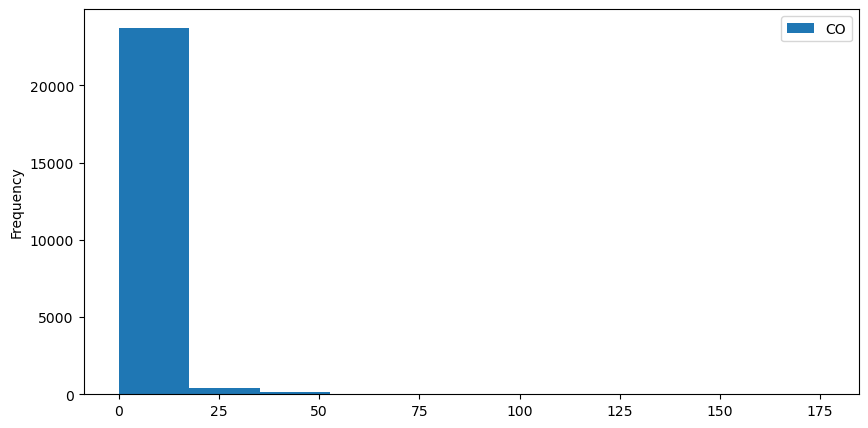

In [22]:
df['CO'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

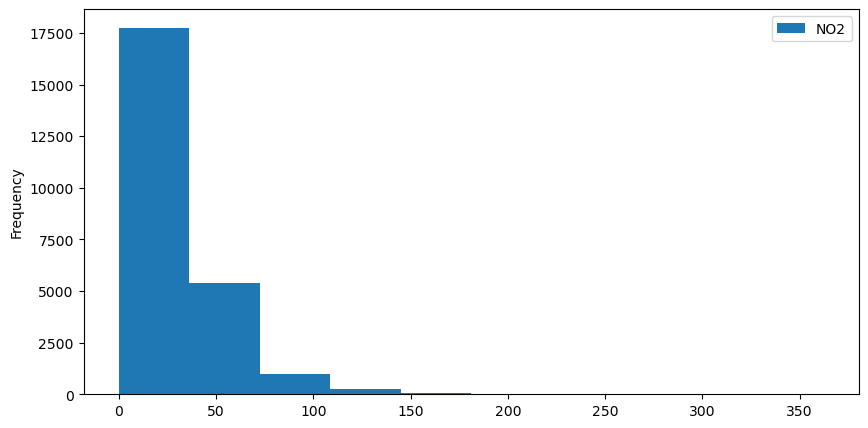

In [23]:
df['NO2'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

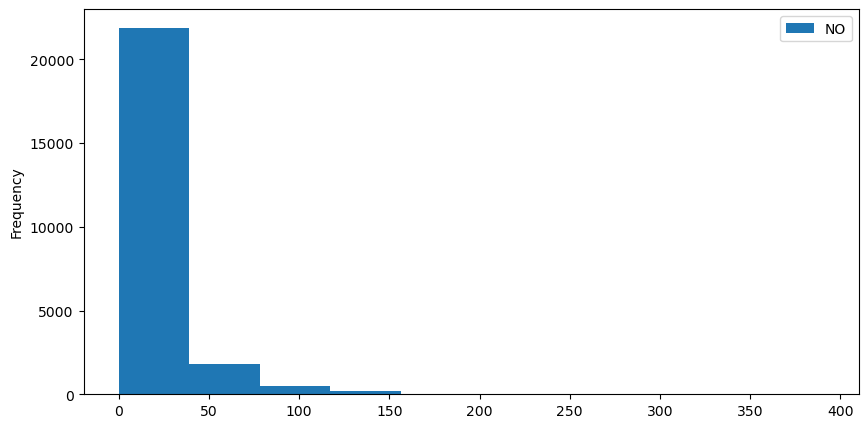

In [24]:
df['NO'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

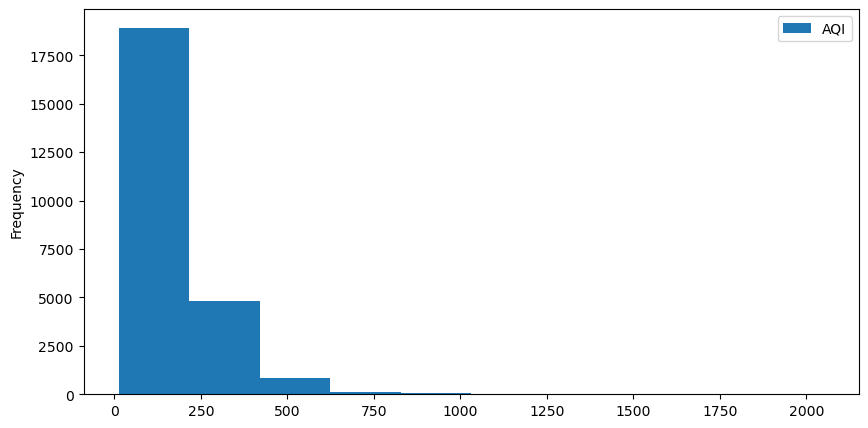

In [25]:
df['AQI'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

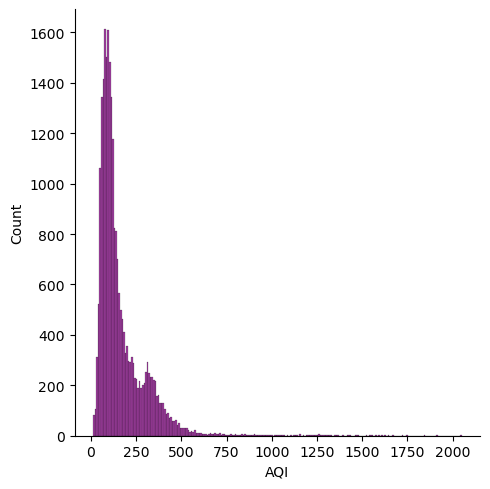

In [26]:
#Distribution of AQI from 2015 to 2020
sns.displot(df,x='AQI',color='purple')
plt.show()

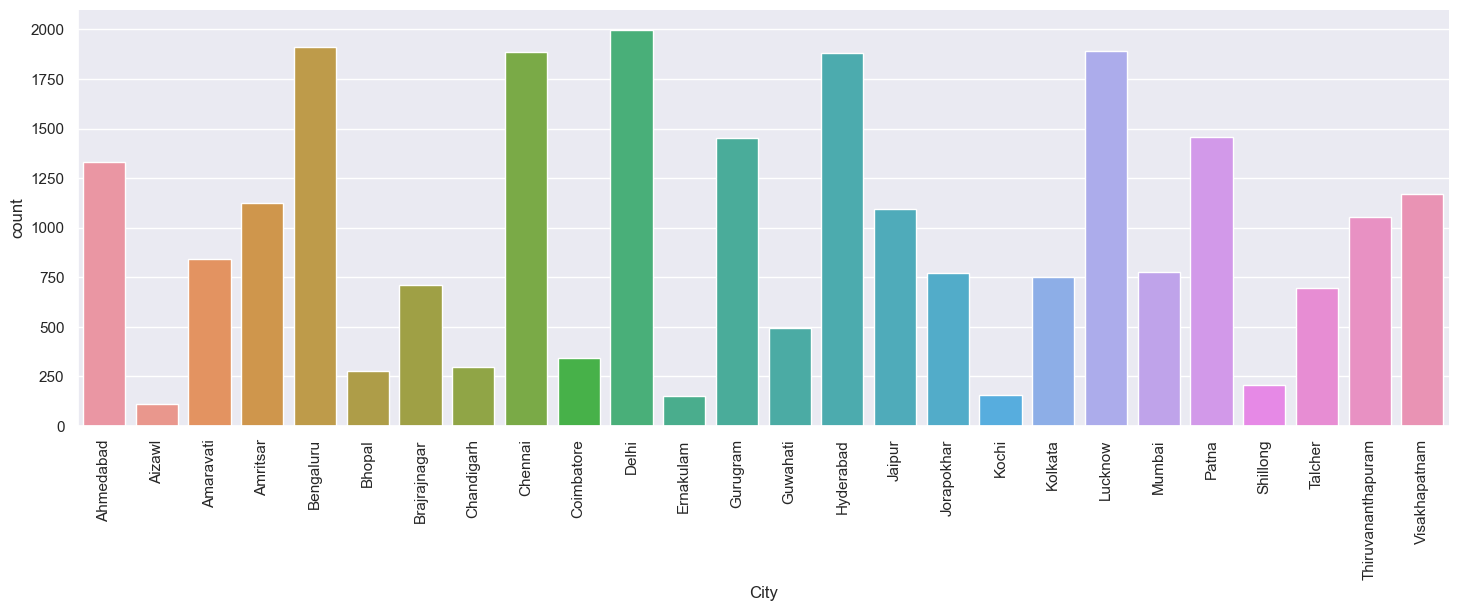

In [27]:
#Bi-variate 
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City",kind='count',data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

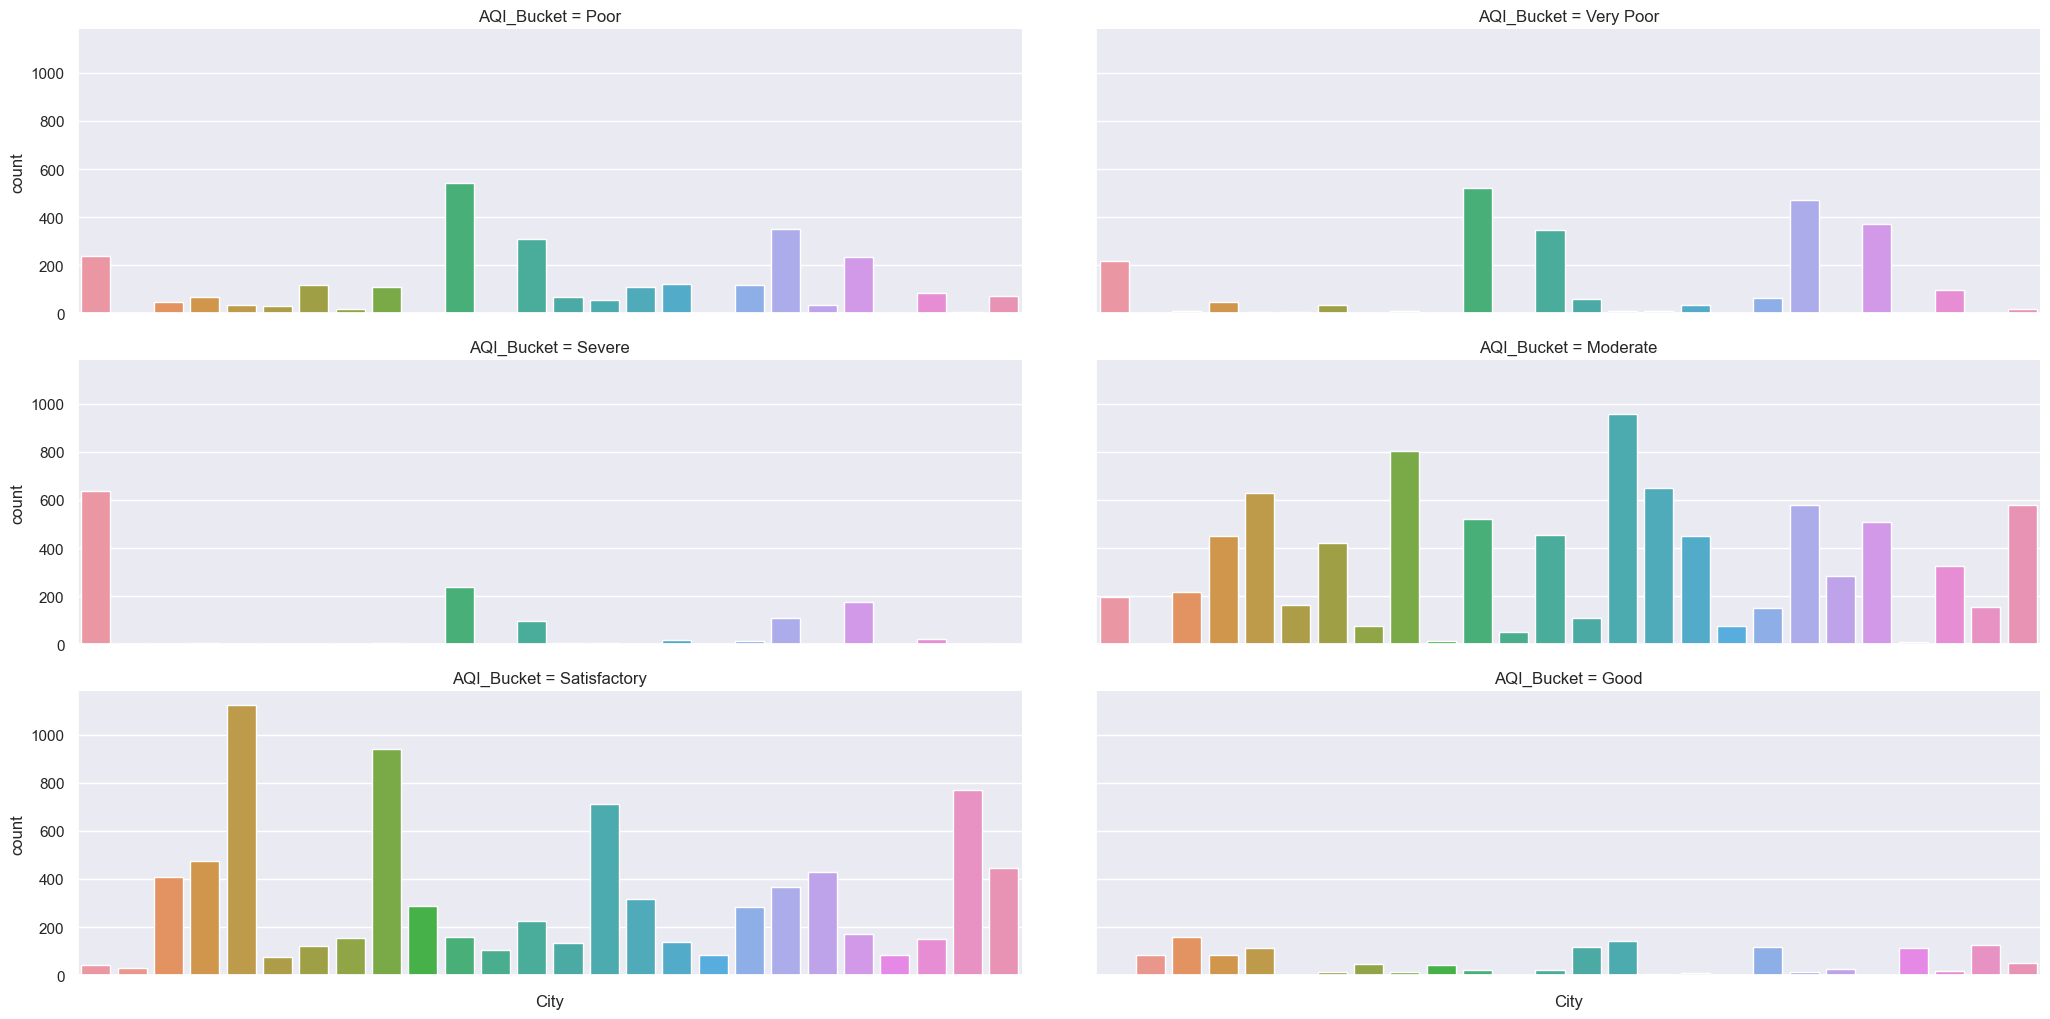

In [28]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City",kind='count',data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

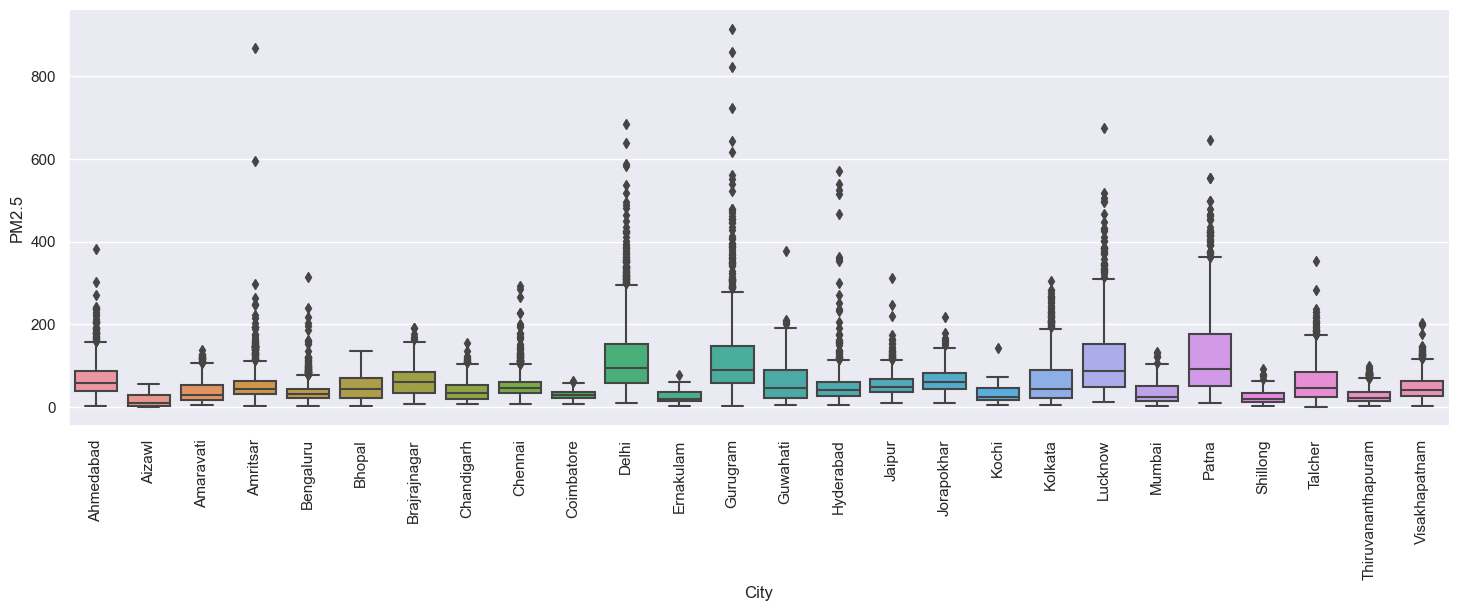

In [29]:
graph1 = sns.catplot(x='City',y='PM2.5',kind='box',data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

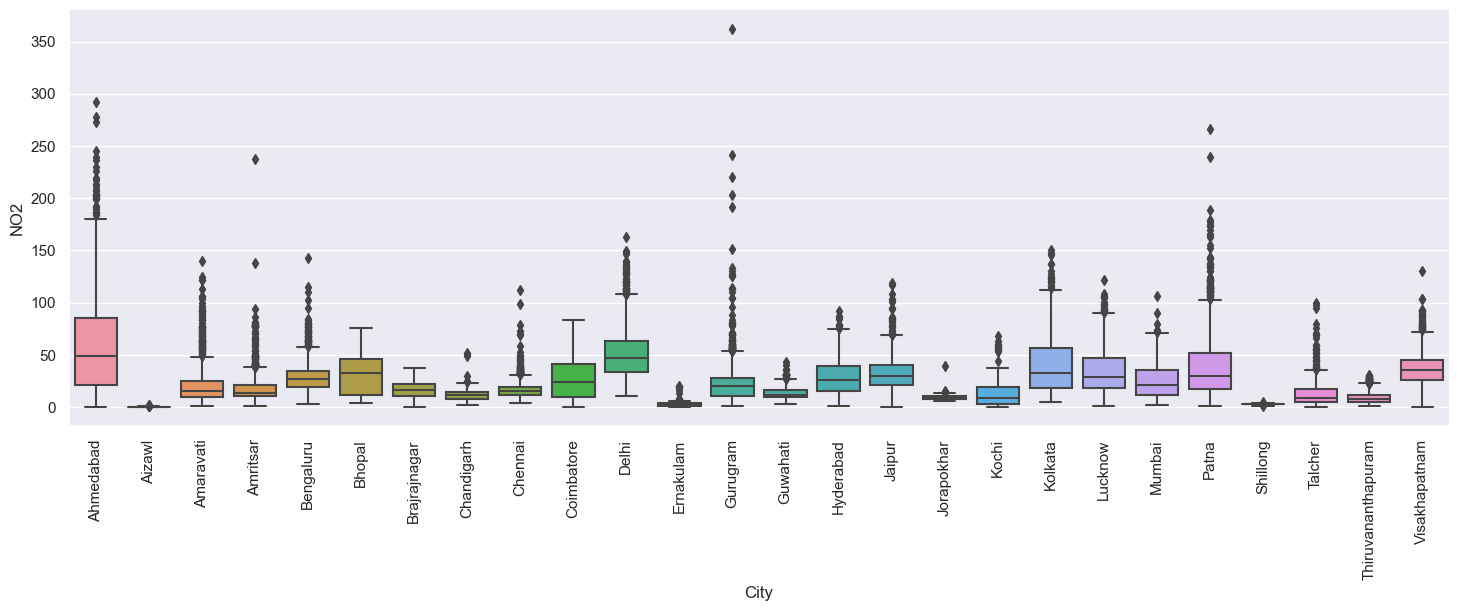

In [30]:
graph2 = sns.catplot(x='City',y='NO2',kind='box',data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

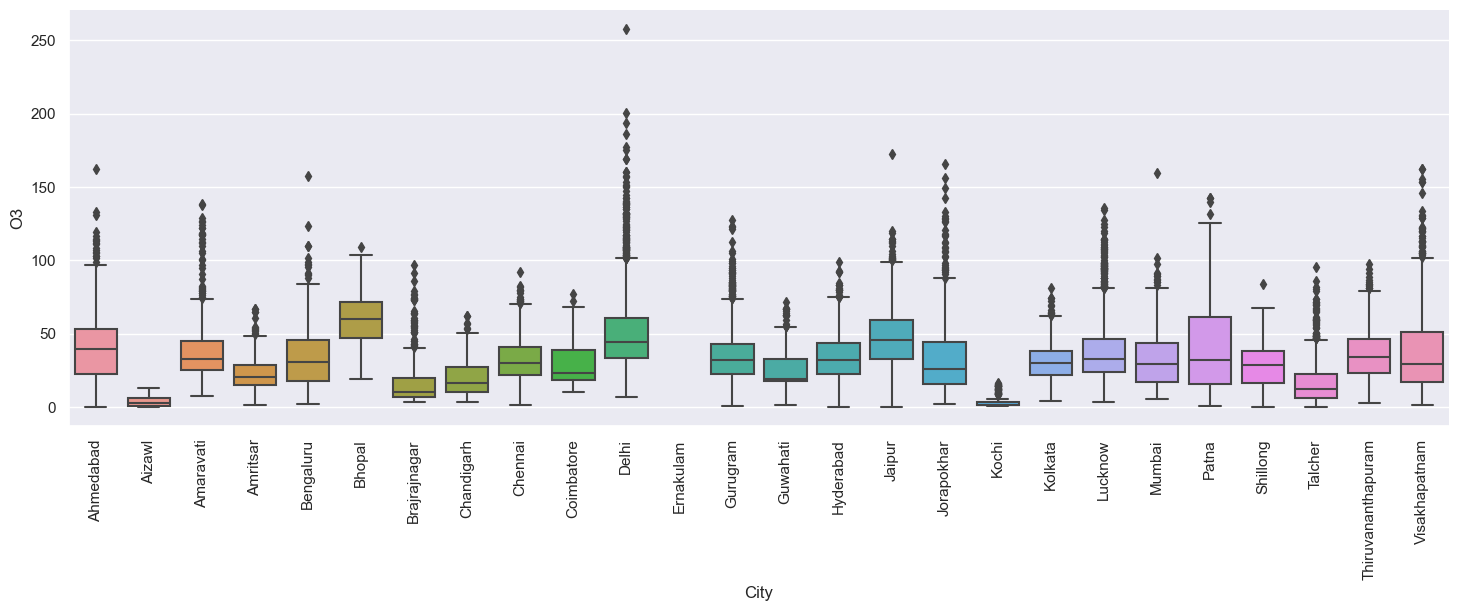

In [31]:
graph3 = sns.catplot(x='City',y='O3',kind='box',data=df,height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

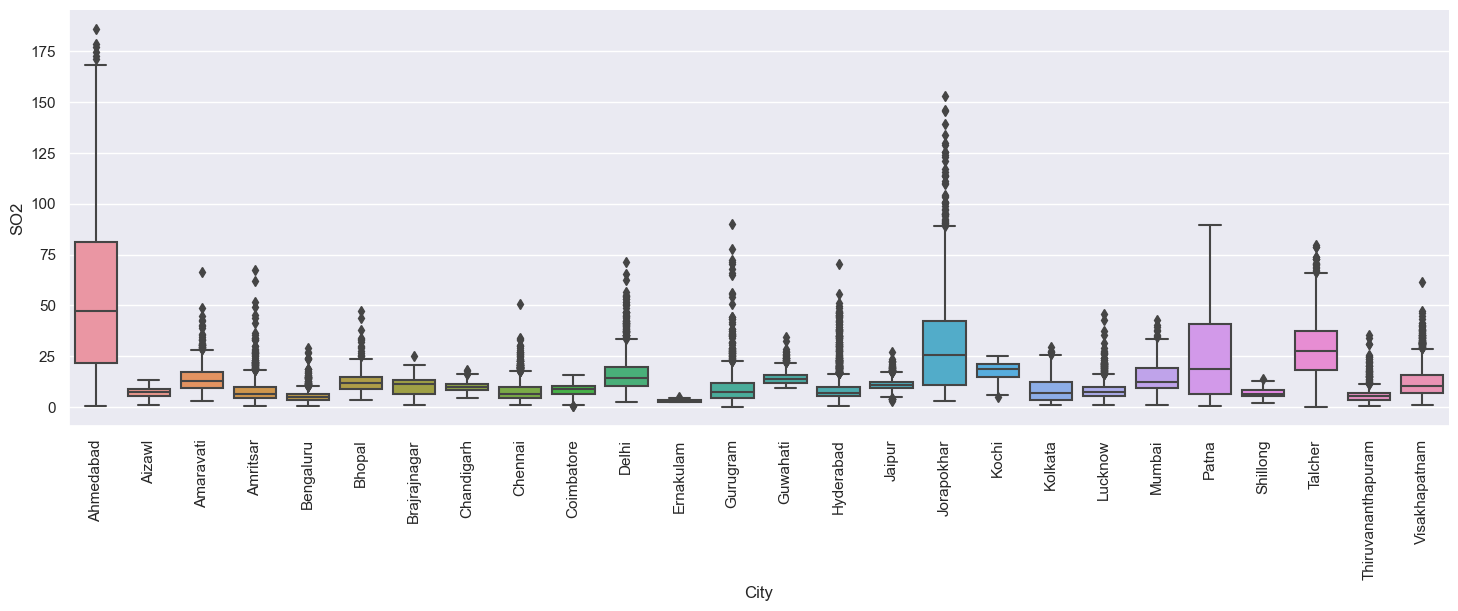

In [32]:
graph4 = sns.catplot(x='City',y='SO2',kind='box',data=df,height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

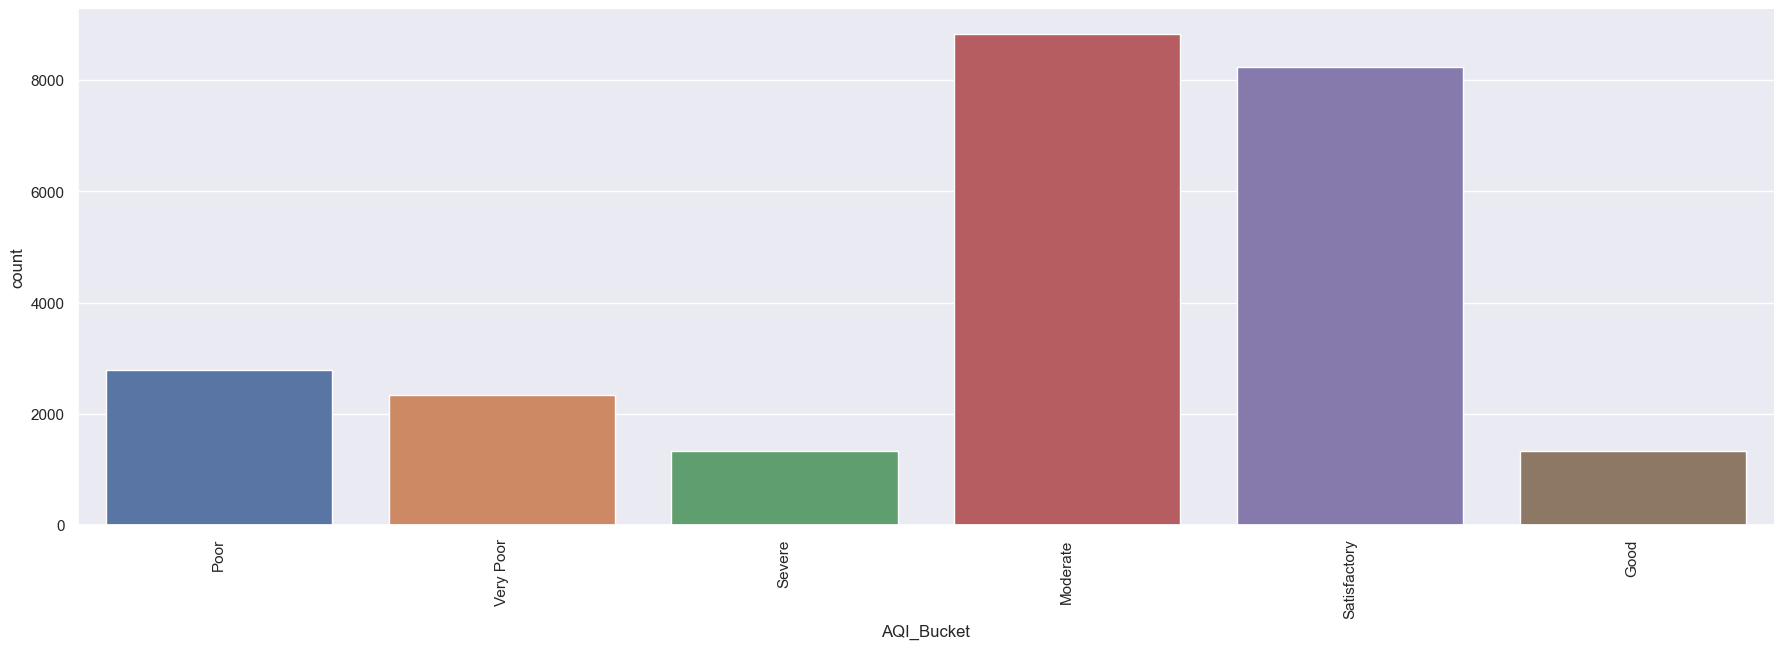

In [33]:
graph5 = sns.catplot(x='AQI_Bucket',data=df,kind='count',height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

In [34]:
#To check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [35]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [36]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683},
})

In [37]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [38]:
df = df.drop(['AQI_Bucket'],axis=1)

In [39]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

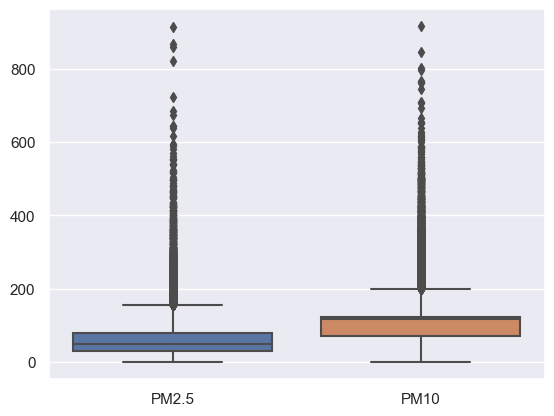

In [40]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

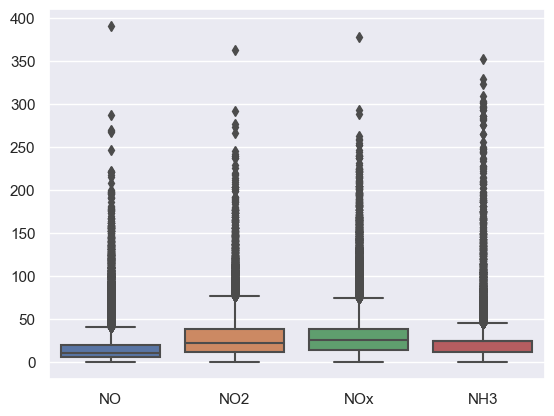

In [41]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

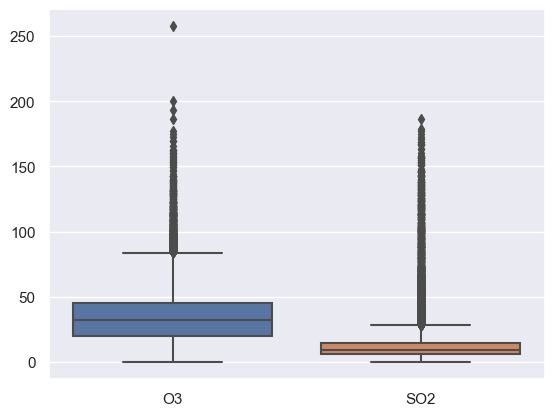

In [42]:
sns.boxplot(data=df[['O3','SO2']])

<Axes: >

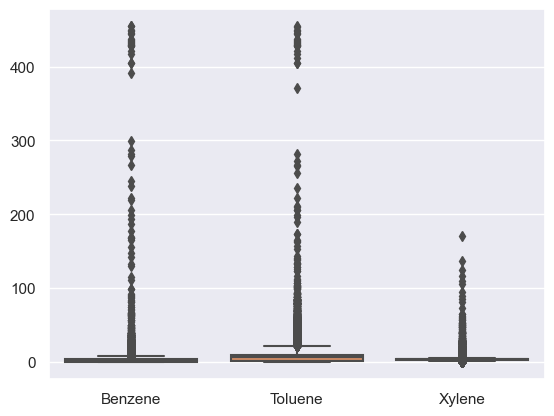

In [43]:
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

In [44]:
#IQR Method 0 Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lb = Q1-1.5*IQR
        ub = Q3+1.5*IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x<lb else (Q3 if x>ub else x)
        )
    return df

In [45]:
df = replace_outliers(df)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

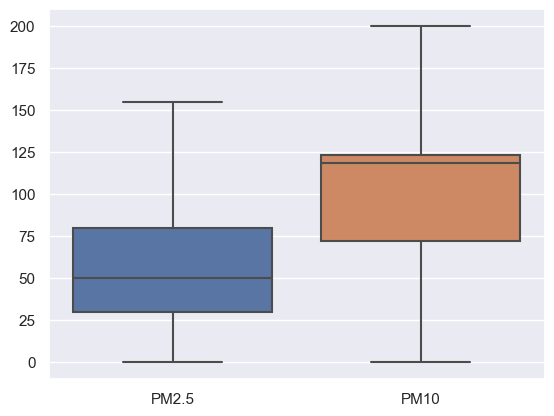

In [47]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

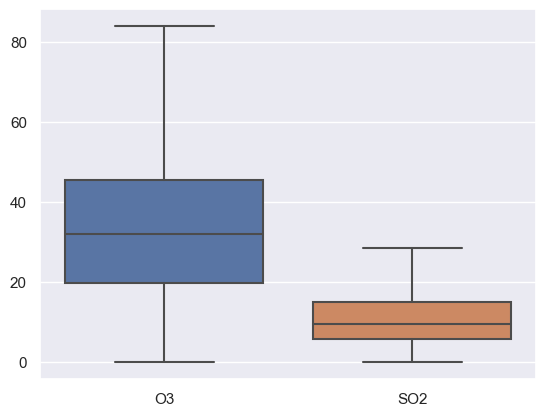

In [48]:
sns.boxplot(data=df[['O3','SO2']])

<Axes: >

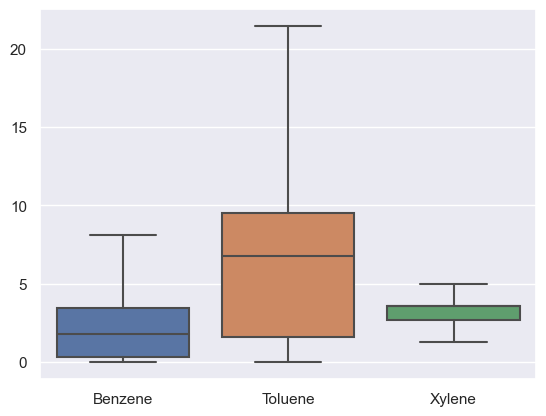

In [49]:
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

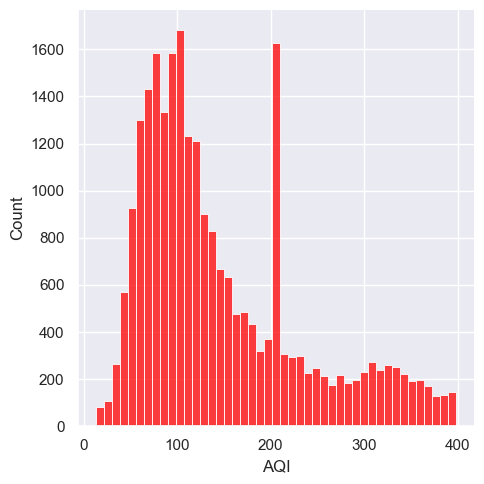

In [50]:
sns.displot(df,x='AQI',color='red')
plt.show()

In [51]:
df1 = df.drop(columns=['City'])

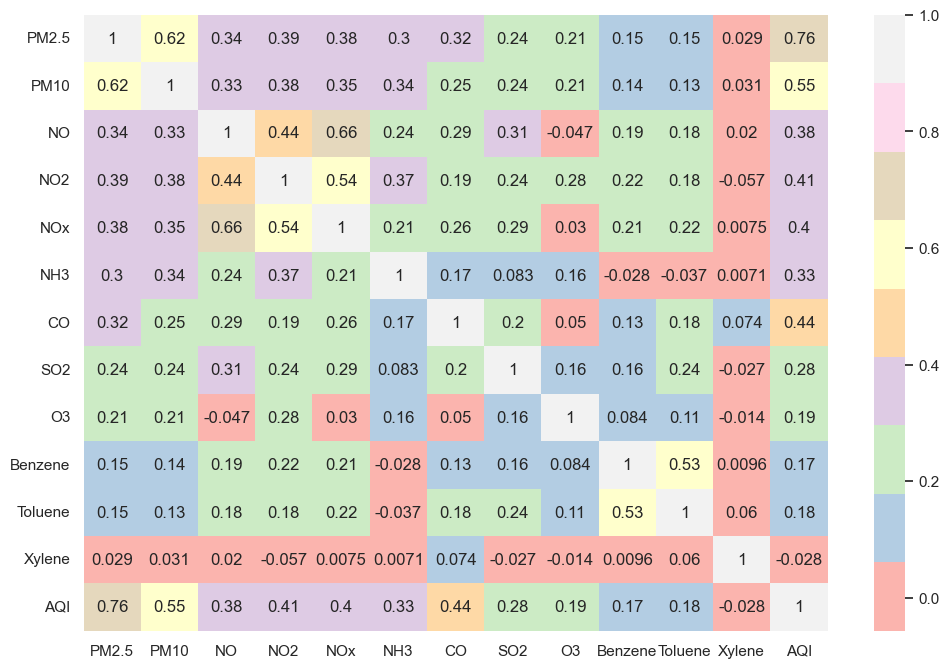

In [52]:
#Multivariate Analysis -Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='Pastel1')
plt.show()

In [53]:
#Week 3- Data Modeling
df.drop(['Date','City'],axis=1,inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


In [55]:
#Scaling - Standard scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.87831149,  0.43765334, -0.63658947, ..., -1.32511601,
        -0.29450027,  0.70999757],
       [ 0.77494642,  0.43765334,  0.15319907, ..., -1.32511601,
         2.69513707,  2.07124258],
       [ 1.23616198,  0.43765334,  1.35614288, ..., -1.32298652,
         0.50873294,  0.69855854],
       ...,
       [-1.01367767, -0.91151782, -1.03376636, ..., -1.32298652,
        -1.17169925, -0.90290618],
       [-1.21066824, -1.31480214, -0.96528759, ..., -1.32511601,
        -1.17169925, -1.06305265],
       [-1.26219369, -0.90460877, -1.3818668 , ...,  0.70336955,
         0.50873294, -1.10880878]])

In [56]:
df = pd.DataFrame(df1,columns =df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500,0.709998
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137,2.071243
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733,0.698559
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733,0.698559
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733,0.698559


In [57]:
#Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [58]:

df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [61]:
# Feature and Target Selection
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [62]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.878311,0.437653,-0.636589,0.168508,0.442764,0.452929,0.795376,0.801871,1.520081,-1.136985,-1.325116,-0.294500
1,0.774946,0.437653,0.153199,0.166708,0.898821,0.452929,0.795376,0.801871,0.698774,-1.126045,-1.325116,2.695137
2,1.236162,0.437653,1.356143,0.405473,1.613267,0.452929,0.795376,0.801871,0.698774,-1.016642,-1.322987,0.508733
3,2.539065,0.437653,0.822008,0.970588,0.718505,0.452929,0.795376,0.801871,0.698774,-0.929119,-1.316598,0.508733
4,0.764500,0.437653,0.822008,0.564449,2.864324,0.452929,0.795376,0.801871,0.698774,-0.896298,-1.312339,0.508733


In [63]:
#Split the data into training and testing data -> Training set = 80% and Test set = 20%
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of Y Train',Y_train.shape)
print('Shape of Y Test',Y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of Y Train (19880,)
Shape of Y Test (4970,)


In [64]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [65]:
# Predicting the value of the LR model
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [66]:
# Matrix evaluation for LR model
RMSE_train = (np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE of training data = ",str(RMSE_train))
print("RMSE of testing data = ",str(RMSE_test))
print('_'*60)
print("R squared value for Train = ",lr.score(X_train,Y_train))
print("R squared value for Test = ",lr.score(X_test,Y_test))

RMSE of training data =  0.5917597964606266
RMSE of testing data =  0.5820293948034536
____________________________________________________________
R squared value for Train =  0.6510774205877974
R squared value for Test =  0.6562598886507953


In [67]:
# KNN (K-Nearest-Neighbour)
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [72]:
# Predicting the value of the KNN model
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

# Matrix evaluation for KNN model
RMSE_train = (np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE of training data = ",str(RMSE_train))
print("RMSE of testing data = ",str(RMSE_test))
print('_'*60)
print("R squared value for Train = ",knn.score(X_train,Y_train))
print("R squared value for Test = ",knn.score(X_test,Y_test))

RMSE of training data =  0.3899105558468102
RMSE of testing data =  0.4802534245936315
____________________________________________________________
R squared value for Train =  0.8485155176263993
R squared value for Test =  0.7659647276447062


In [73]:
#Decision Tree Regression 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [74]:
# Predicting the value of the DTR model
train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)

# Matrix evaluation for DTR model
RMSE_train = (np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE of training data = ",str(RMSE_train))
print("RMSE of testing data = ",str(RMSE_test))
print('_'*60)
print("R squared value for Train = ",dtr.score(X_train,Y_train))
print("R squared value for Test = ",dtr.score(X_test,Y_test))

RMSE of training data =  0.02594854601836432
RMSE of testing data =  0.5481601186861738
____________________________________________________________
R squared value for Train =  0.9993290900734868
R squared value for Test =  0.6951015290963227


In [76]:
#Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
# Predicting the value of the RFR model
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(X_test)

# Matrix evaluation for DTR model
RMSE_train = (np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE of training data = ",str(RMSE_train))
print("RMSE of testing data = ",str(RMSE_test))
print('_'*60)
print("R squared value for Train = ",rfr.score(X_train,Y_train))
print("R squared value for Test = ",rfr.score(X_test,Y_test))

RMSE of training data =  0.1489218695743128
RMSE of testing data =  0.39139347955862785
____________________________________________________________
R squared value for Train =  0.9779018905030411
R squared value for Test =  0.8445582961161447


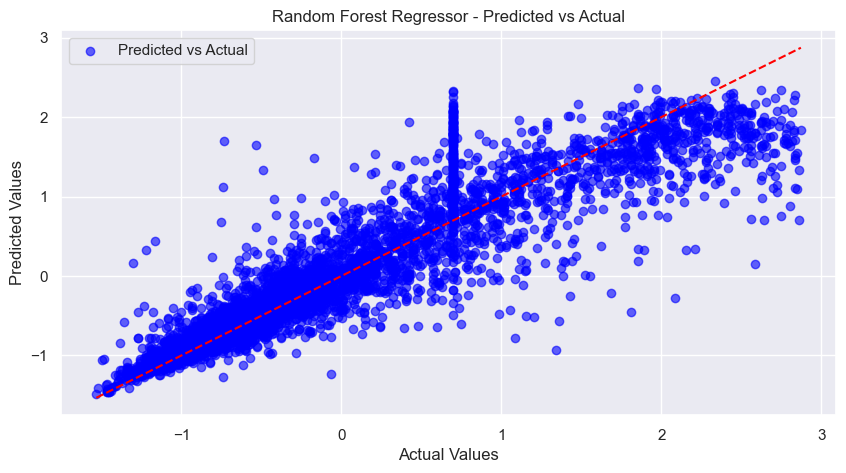

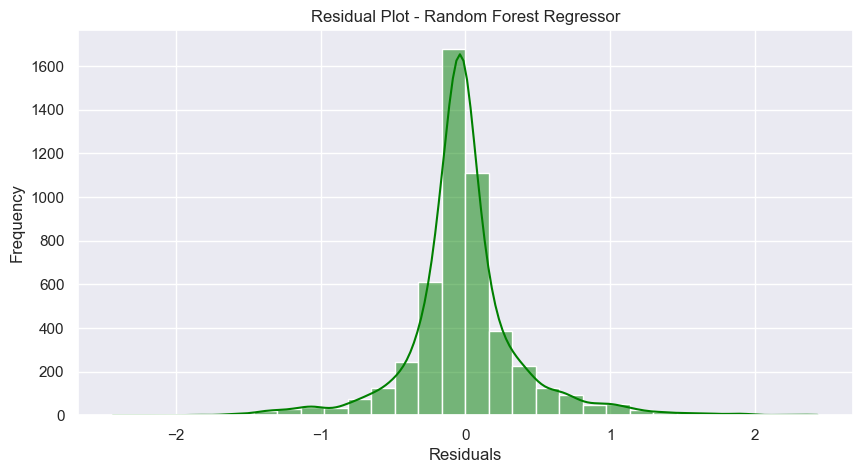

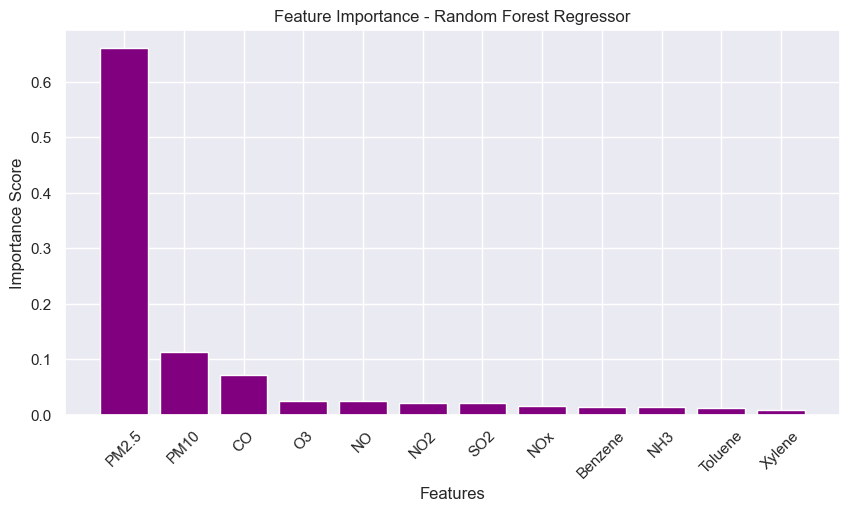

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual Plot
plt.figure(figsize=(10,5))
plt.scatter(Y_test, test_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor - Predicted vs Actual")
plt.legend()
plt.show()

# Residual Plot
residuals = Y_test - test_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Plot - Random Forest Regressor")
plt.show()

# Feature Importance Plot
importances = rfr.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances[sorted_indices], align='center', color='purple')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest Regressor")
plt.show()
